<a href="https://colab.research.google.com/github/AnaghaMS1/MiniProject/blob/main/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import tensorflow as tf
tf.keras.datasets.mnist.load_data(path="mnist.npz")
mnist = tf.keras.datasets.mnist

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() #28x28 sized images ranging 0-9

In [ ]:
x_train.shape
# y_train.shape
# x_test.shape
# y_test.shape

(60000, 28, 28)

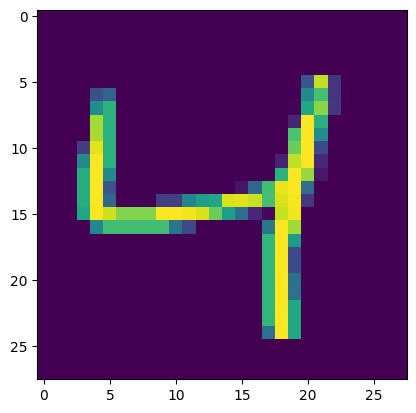

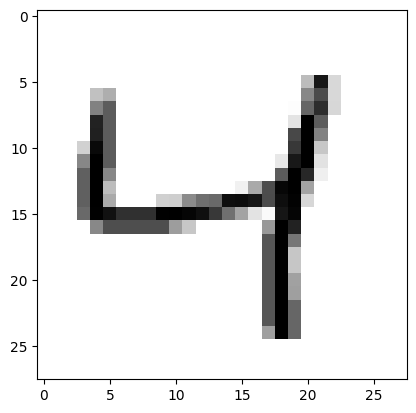

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary) #inverted

In [ ]:
print(x_train[2]) #bg pixels are 0(before inversion values), only digit pixels >0

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [ ]:
#in order to train, need to normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

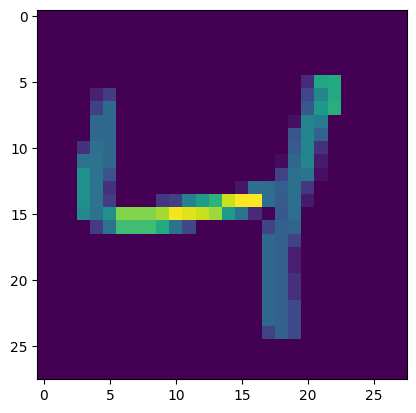

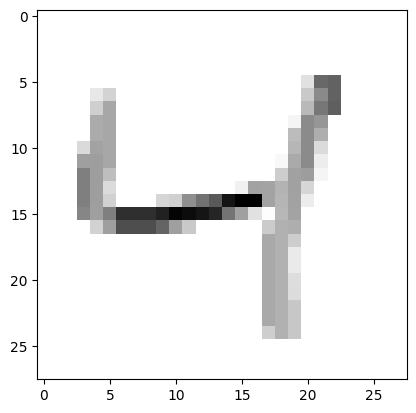

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [ ]:
print(x_train[2]) #all values normalized to 0-1 because of /255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[2])

4


In [ ]:
import numpy as np
IMG_SIZE = 28
#increasing one dimension for kernel operation, resizing to make it suitable for convolution operation//             n+2p-f+1
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #-1 corresponds to 60,000, [60000x28x28x1]
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension: ",x_trainr.shape)
print("Testing samples dimension: ",x_testr.shape)

Training samples dimension:  (60000, 28, 28, 1)
Testing samples dimension:  (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_trainr)

In [ ]:
model = Sequential()

#First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:],kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
#only for first convolution need to mention
#slicing because (60,000,28,28,1)// we dont need 60000, iterating one by one
model.add(Activation("relu"))
#activation function- to make it non linear[value<0 drop| value>0 allow to second layer] , 64 kernels/filters of 3x3 size
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling [single max value of 2x2 kernel]

#size becomes 28-3+1=26x26 / n-f+1

#Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



#Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
#before moving to fully connected layer we need to flatten 2D to 1D | 20x20=400

model.add(Dense(64)) #neural network layer
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer
model.add(Dense(10)) #must be equal to 10 becaue of the number of classes (0-9)
model.add(Activation("softmax")) #activation function noe changed to softmax (class probabilities)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(datagen.flow(x_trainr,y_train),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 47s 18ms/step - loss: 0.4017 - accuracy: 0.8830
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1562 - accuracy: 0.9577
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1137 - accuracy: 0.9681
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0943 - accuracy: 0.9742
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0806 - accuracy: 0.9779
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0717 - accuracy: 0.9804
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0644 - accuracy: 0.9820
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0580 - accuracy: 0.9839
Epoch 9/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0532 - accuracy: 0.9855
Epoch 10/20
1875/1875 [==============================] - 25s 13m

In [ ]:
print(min(history.history['accuracy']))

print(max(history.history['accuracy']))

0.8829500079154968
0.9921333193778992


In [ ]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples: ",test_loss)
print("Validation accuracy on 10,000 test samples: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9853
Test loss on 10,000 test samples:  0.06440720707178116
Validation accuracy on 10,000 test samples:  0.9853000044822693


In [ ]:
prediction = model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# ... (your model definition and other code)

# Specify a model checkpoint callback to save the model during training
checkpoint_path = '/content/drive/MyDrive/miniproject/your_model1.h5'  # Replace with your desired path
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the model checkpoint callback
model.fit(datagen.flow(x_trainr, y_train), epochs=1, validation_data=(x_testr, y_test), callbacks=[checkpoint])

1875/1875 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9917

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 30s 15ms/step - loss: 0.0295 - accuracy: 0.9917 - val_loss: 0.0578 - val_accuracy: 0.9880


Saving sample2.jpg to sample2.jpg
1/1 [==============================] - 0s 22ms/step


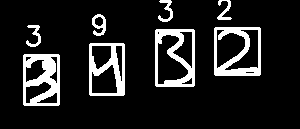

In [ ]:
#sequence of number
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Upload the pre-trained CNN model file and the input image file
uploaded_files = files.upload()

# Check the uploaded file names
uploaded_model_name = "/content/drive/MyDrive/miniproject/your_model1.h5"
uploaded_image_name = [name for name in uploaded_files.keys() if name not in [uploaded_model_name]][0]

# Step 1: Load the pre-trained CNN model
model = load_model(uploaded_model_name)

# Step 2: Load and process the input image using OpenCV
img = cv2.imdecode(np.frombuffer(uploaded_files[uploaded_image_name], np.uint8), cv2.IMREAD_GRAYSCALE)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img = cv2.bitwise_not(img)
img = cv2.dilate(img, None, iterations=1)

# Step 3: Find contours in the image to identify individual digits
contours, _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

# Step 4: For each digit, preprocess it and make a prediction using the pre-trained model
for i, rect in enumerate(rects):
    x, y, w, h = rect
    digit = img[y:y+h, x:x+w]
    digit = cv2.copyMakeBorder(digit, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
    digit = cv2.resize(digit, (28, 28))

    # Preprocess the digit for the model
    digit = digit.astype("float32") / 255.0
    digit = np.expand_dims(digit, axis=-1)
    digit = np.expand_dims(digit, axis=0)

    # Step 5: Make a prediction using the pre-trained model
    prediction = model.predict(digit)
    digit_class = np.argmax(prediction)

    # Display the predicted digit on the original image
    cv2.putText(img, str(digit_class), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the original image with results using cv2_imshow
cv2_imshow(img)

Saving sample5.jpg to sample5.jpg
1/1 [==============================] - 0s 26ms/step


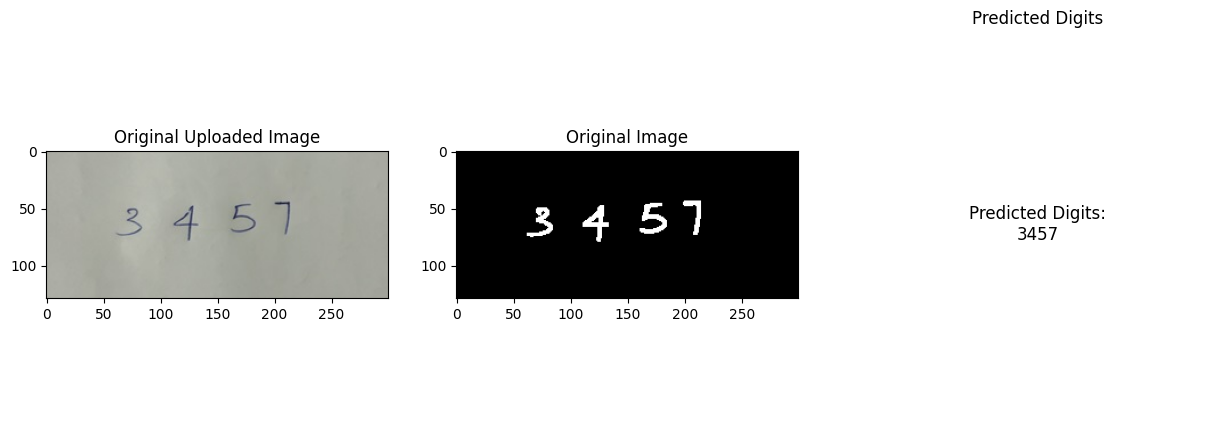

In [ ]:
# correct
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Upload the pre-trained CNN model file and the input image file
uploaded_files = files.upload()

# Check the uploaded file names
uploaded_model_name = "/content/drive/MyDrive/miniproject/your_model1.h5"
uploaded_image_name = [name for name in uploaded_files.keys() if name not in [uploaded_model_name]][0]

# Step 1: Load the pre-trained CNN model
model = load_model(uploaded_model_name)

# Step 2: Load and process the input image using OpenCV
img = cv2.imdecode(np.frombuffer(uploaded_files[uploaded_image_name], np.uint8), cv2.IMREAD_GRAYSCALE)
original_img = cv2.imdecode(np.frombuffer(uploaded_files[uploaded_image_name], np.uint8), cv2.IMREAD_COLOR)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img = cv2.bitwise_not(img)
img = cv2.dilate(img, None, iterations=1)

# Step 3: Find contours in the image to identify individual digits
contours, _ = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

# Sort contours based on the sum of x and y coordinates of the bounding box
rects = sorted(rects, key=lambda x: sum(x[:2]))

# Create a subplot to display the original image, exact uploaded image, and the predicted digits
plt.figure(figsize=(15, 5))  # Increased figure size

# Display the original uploaded image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Uploaded Image')

# Display the original image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Create an empty string to store the predicted digits
predicted_digits = ""

# Iterate through the sorted contours (digits)
for i, rect in enumerate(rects):
    x, y, w, h = rect
    digit = img[y:y+h, x:x+w]
    digit = cv2.copyMakeBorder(digit, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
    digit = cv2.resize(digit, (28, 28))

    # Preprocess the digit for the model
    digit = digit.astype("float32") / 255.0
    digit = np.expand_dims(digit, axis=-1)
    digit = np.expand_dims(digit, axis=0)

    # Make a prediction using the pre-trained model
    prediction = model.predict(digit)
    digit_class = np.argmax(prediction)

    # Append the predicted digit to the string
    predicted_digits += str(digit_class)

# Display the predicted digits in a text box
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, 'Predicted Digits:\n' + predicted_digits, ha='center', va='center', fontsize=12)
plt.axis('off')
plt.title('Predicted Digits')

# Show the plot
plt.show()